# Importing all the required libraries

In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Data Collection & Understanding

In [666]:
df=pd.read_csv('sportify_data.csv')


In [417]:
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,sqrt_instrumentalness,danceability_energy,duration_instrumentalness,speechiness_valence,tempo_danceability,energy_tempo,valence_squared,tempo_squared,speechiness_squared,log_loudness
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,...,0.147986,0.361522,4480.740000,0.123266,125.001646,65.126908,0.081796,22518.603844,0.185761,2.281872
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,...,0.078166,0.266737,1997.560630,0.046687,118.941669,57.469797,0.345744,25626.566889,0.006304,2.433701
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,...,0.015297,0.345256,43.455438,0.049997,62.886872,30.918128,0.029929,5631.601936,0.083521,2.097772
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,...,0.714143,0.166972,101700.630000,0.006003,42.715192,29.226184,0.052900,7476.715024,0.000681,2.787231
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,...,0.715542,0.380358,201161.216000,0.062738,117.974712,97.616244,0.817216,30277.392016,0.004816,2.537499


In [418]:
df.shape

(2017, 35)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2017 non-null   int64  
 1   acousticness                  2017 non-null   float64
 2   danceability                  2017 non-null   float64
 3   duration_ms                   2017 non-null   int64  
 4   energy                        2017 non-null   float64
 5   instrumentalness              2017 non-null   float64
 6   key                           2017 non-null   int64  
 7   liveness                      2017 non-null   float64
 8   loudness                      2017 non-null   float64
 9   mode                          2017 non-null   int64  
 10  speechiness                   2017 non-null   float64
 11  tempo                         2017 non-null   float64
 12  time_signature                2017 non-null   float64
 13  val

In [10]:
df.shape

(2017, 17)

In [14]:
df['key'].unique

<bound method Series.unique of 0       2
1       1
2       2
3       5
4       5
       ..
2012    1
2013    1
2014    0
2015    1
2016    9
Name: key, Length: 2017, dtype: int64>

Exploratory Data Analysis (EDA)

In [15]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

#  Spotify Dataset - Feature Descriptions  

- **`Unnamed: 0`**: Index column, likely an auto-generated ID for each song entry.  

- **`acousticness`**: A confidence measure (0 to 1) of whether the track is acoustic. Higher values indicate more acoustic sounds.  

- **`danceability`**: Describes how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and regularity (0 to 1).  

- **`duration_ms`**: Length of the track in milliseconds.  

- **`energy`**: Measures intensity and activity of a track (0 to 1). High energy means a louder, more dynamic track.  

- **`instrumentalness`**: Predicts whether a track has vocals. Closer to 1 suggests more instrumental sound, while 0 means mostly vocal.  

- **`key`**: The musical key of the track (0 to 11), where 0 = C, 1 = C#, ..., 11 = B.  

- **`liveness`**: Detects presence of an audience. Higher values (>0.8) suggest a live performance.  

- **`loudness`**: The overall loudness of a track in decibels (dB). Generally ranges from -60 to 0 dB.  

- **`mode`**: Indicates the modality (scale type) of a track. 0 = Minor, 1 = Major.  

- **`speechiness`**: Detects spoken words in a track. Higher values (>0.66) indicate more spoken word content (like podcasts or rap songs).  

- **`tempo`**: The estimated tempo of a track in beats per minute (BPM). Defines the song’s speed or pace.  

- **`time_signature`**: Estimated time signature (e.g., 3 = 3/4, 4 = 4/4), indicating beats per measure.  

- **`valence`**: Describes the musical positivity of a track (0 to 1). Higher values sound more cheerful, while lower values are more sad or serious.  

- **`target`**: The classification label (e.g., hit or non-hit song). Used as the dependent variable for ML models.  

- **`song_title`**: The name of the song.  

- **`artist`**: The name of the song’s performer or band.  


In [21]:
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
    'liveness', 'loudness',  'tempo',  'valence', 'speechiness', 'instrumentalness']
discrete_cols = ['key','mode','time_signature','target']

# Analyzing Correlations Through Visualization

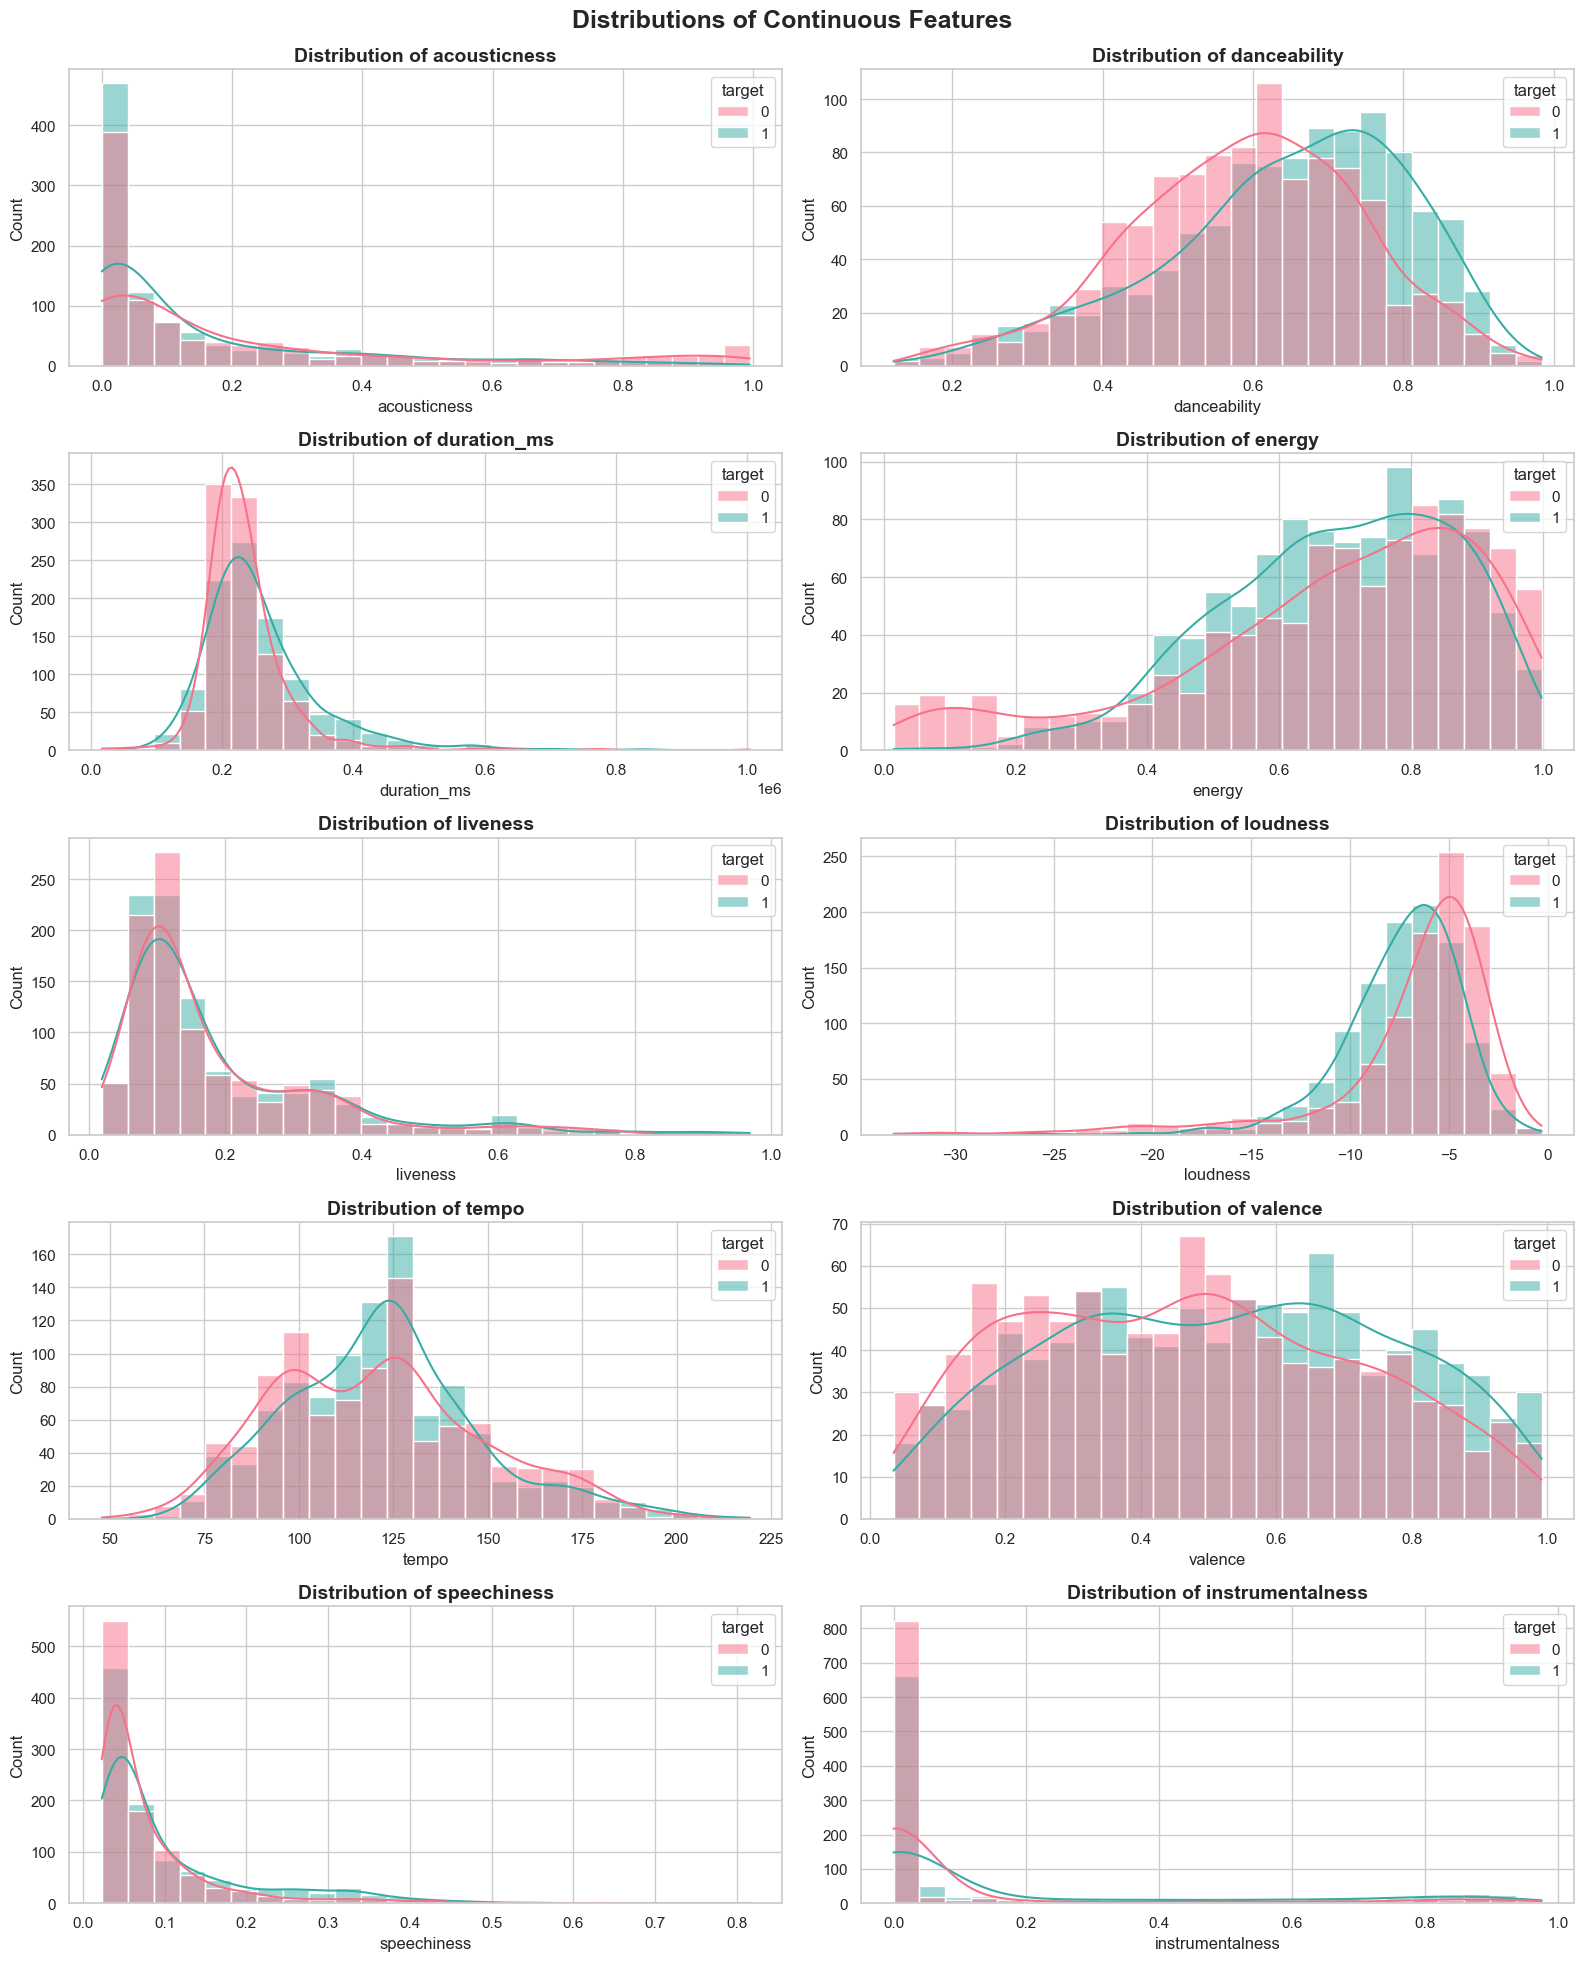

In [34]:
# Set the Seaborn theme for better visualization
sns.set_theme(style="whitegrid")

# Create a figure with 5 rows and 2 columns of subplots, setting the overall size
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

# Define a color palette for different target values
palette = sns.color_palette("husl", n_colors=df['target'].nunique())  # Ensure the number of colors matches unique target values

# Flatten the 2D axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each continuous feature in the dataset
for i, col in enumerate(continuous_cols):
    # Create a histogram for the current feature, differentiating values by 'target'
    sns.histplot(data=df, x=col, hue='target', bins=25, kde=True, ax=axes[i], palette=palette)
    
    # Set a title for each subplot with formatting
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')

# Set the overall title for the figure
fig.suptitle('Distributions of Continuous Features', fontsize=18, fontweight='bold')

# Adjust layout for better spacing
fig.tight_layout()

# Adjust the top margin to prevent overlap with the figure title
fig.subplots_adjust(top=0.95)

# Display the final plot
plt.show()
# Plot the distribution of continuous features, grouped by 'target'
# Helps analyze if certain features (e.g., energy, speechiness) differ between successful and unsuccessful songs


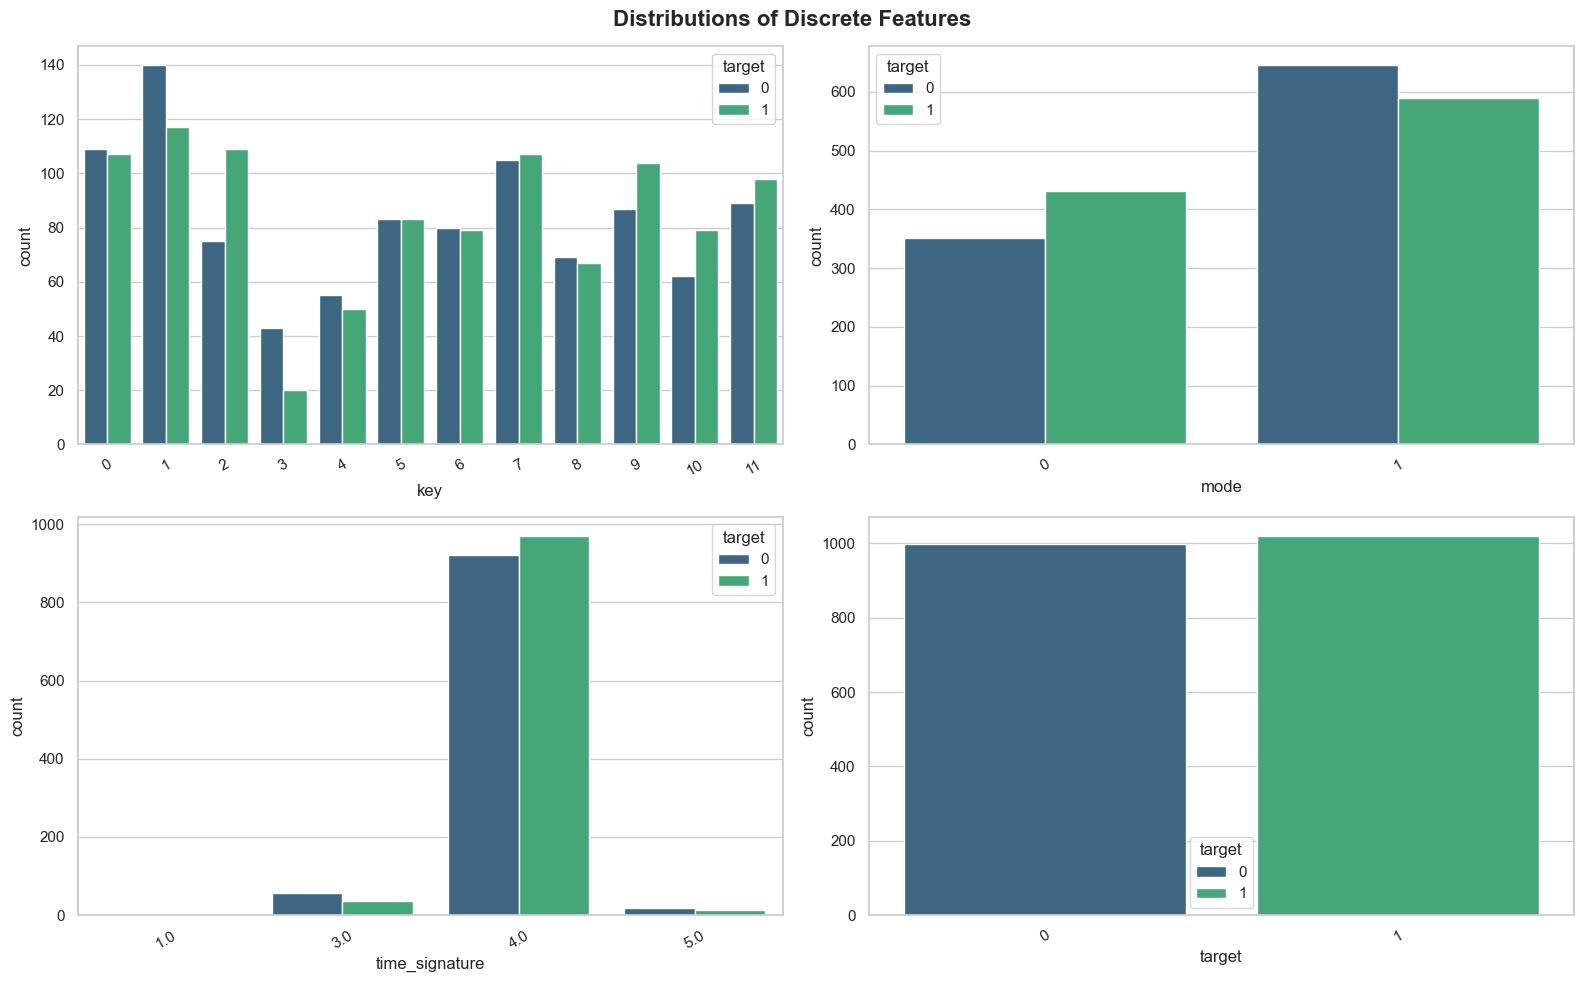

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Loop through discrete features and plot
for i, col in enumerate(discrete_cols):
    # Use a palette that dynamically adjusts to the number of hue categories
    unique_hues = df['target'].nunique()
    palette = sns.color_palette("viridis", unique_hues)  

    sns.countplot(data=df, x=col, ax=axes[i], hue='target', palette=palette)
    
    # Rotate labels correctly
    axes[i].tick_params(axis='x', rotation=30)

fig.suptitle('Distributions of Discrete Features', fontsize=16, fontweight='bold')

plt.tight_layout()  # Improve spacing
plt.show()

# Plot the distribution of discrete features (e.g., key, mode, time signature)
# Helps identify if certain categories (e.g., major/minor key) are more common in hit songs


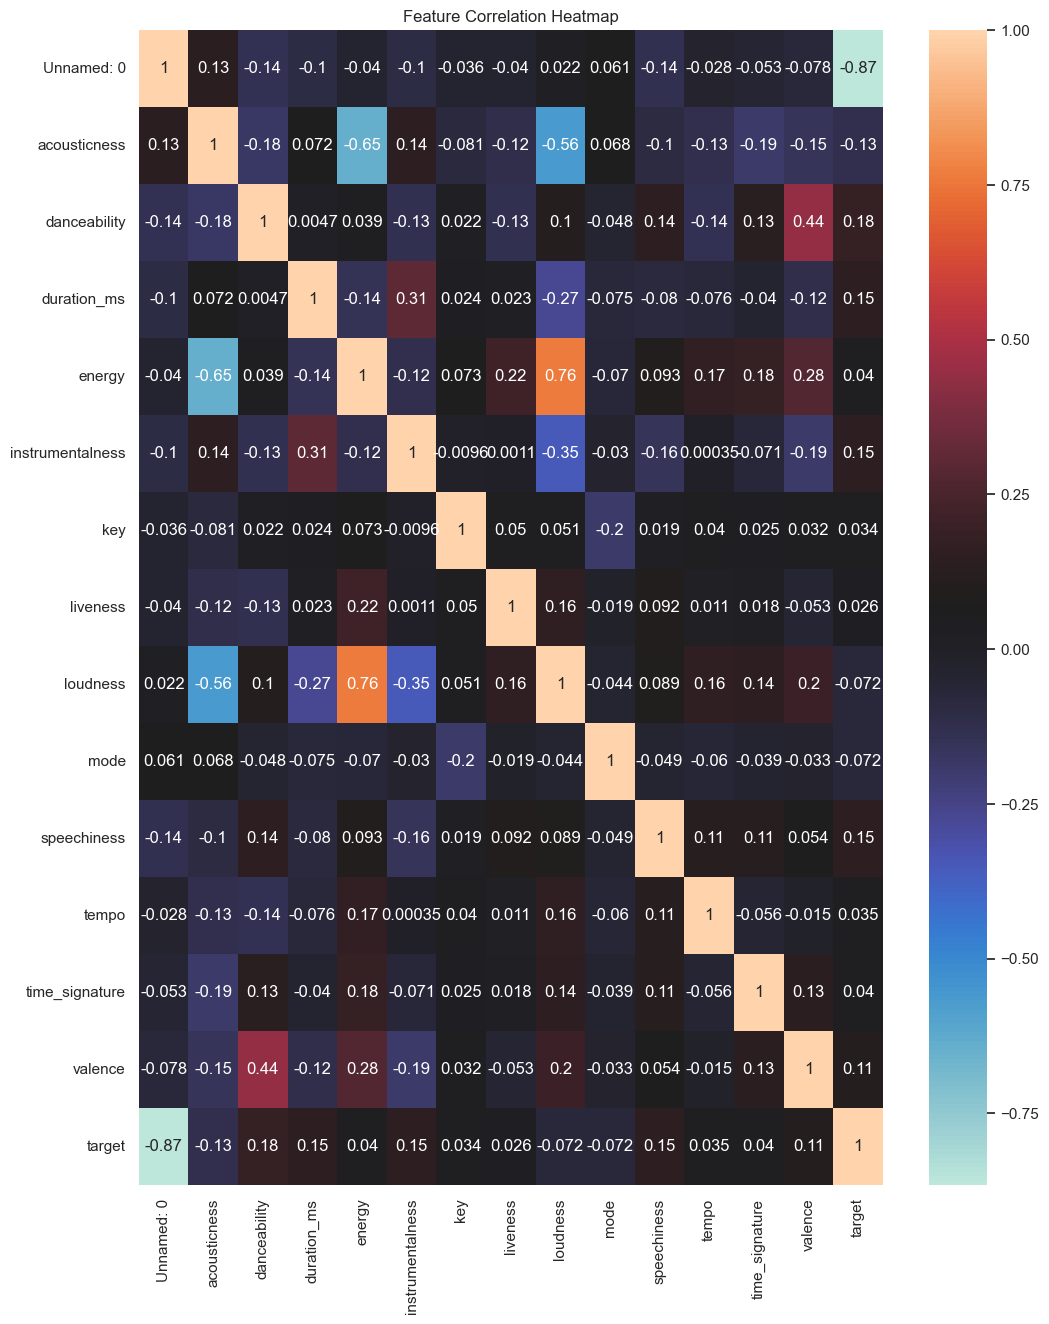

In [52]:
correlation =df.drop(columns=['song_title', 'artist']).corr()
plt.figure(figsize=(12,15))
sns.heatmap(correlation, cmap='icefire', annot=True)

plt.title("Feature Correlation Heatmap")
plt.show()
# Display correlation between numerical features
# A high positive correlation (close to +1) means features increase together
# A high negative correlation (close to -1) means when one increases, the other decreases
# Helps find key relationships (e.g., energy vs. loudness, speechiness vs. instrumentalness)


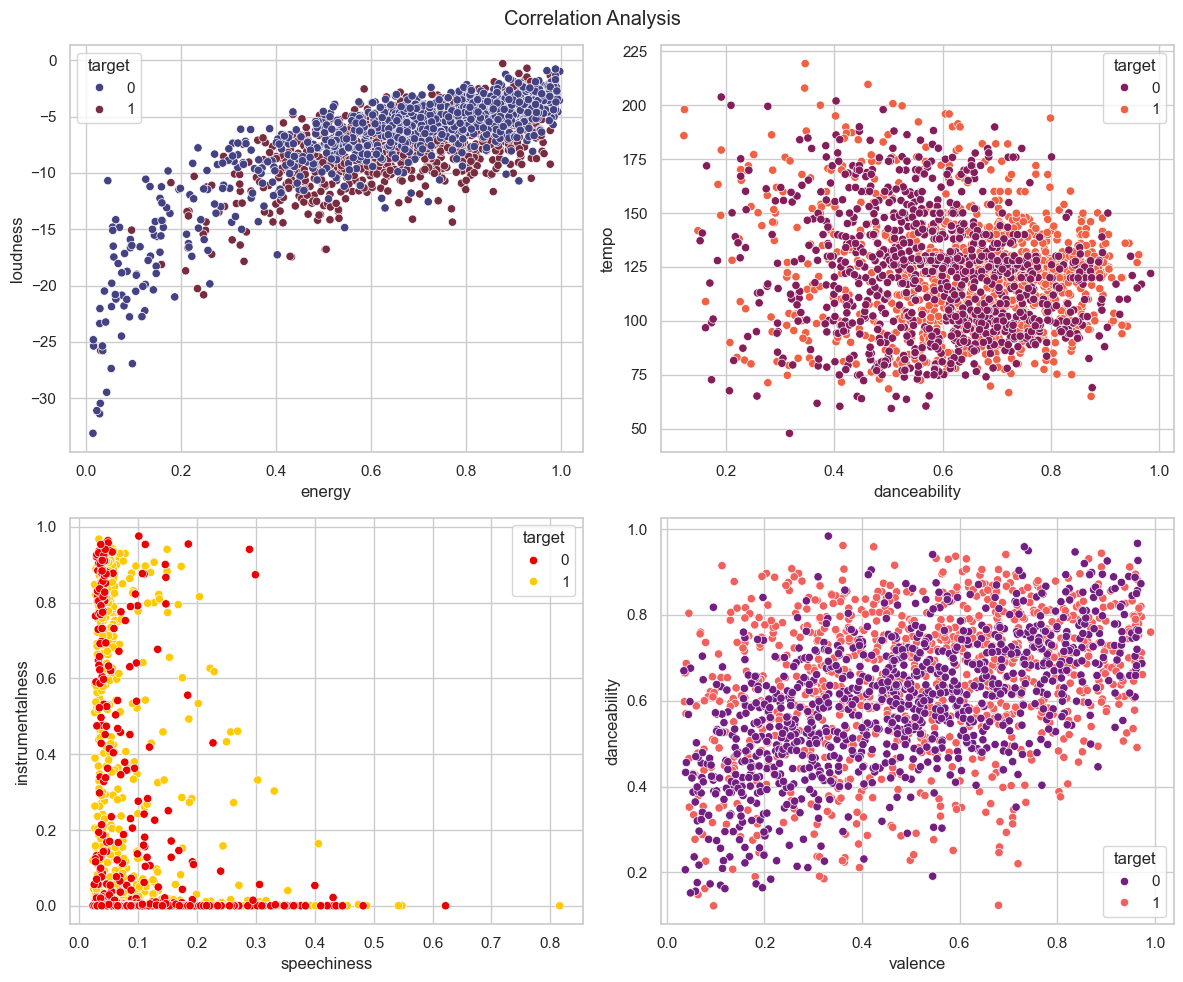

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

fig.suptitle('Correlation Analysis')

sns.scatterplot(data=df, x='energy', y='loudness', hue='target', palette='icefire', ax=axes[0])
sns.scatterplot(data=df, x='danceability', y='tempo', hue='target', palette='rocket', ax=axes[1])
sns.scatterplot(data=df, x='speechiness', y='instrumentalness', hue='target', palette='hot', ax=axes[2])
sns.scatterplot(data=df, x='valence', y='danceability', hue='target', palette='magma', ax=axes[3])

plt.tight_layout()
plt.show()

# Scatterplot to visualize relationships between key audio features
# If points form a strong trend, the features are correlated
# Example: If energy and loudness show an upward trend, then high-energy songs tend to be louder



/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_44995/3042348965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='valence', palette='coolwarm')


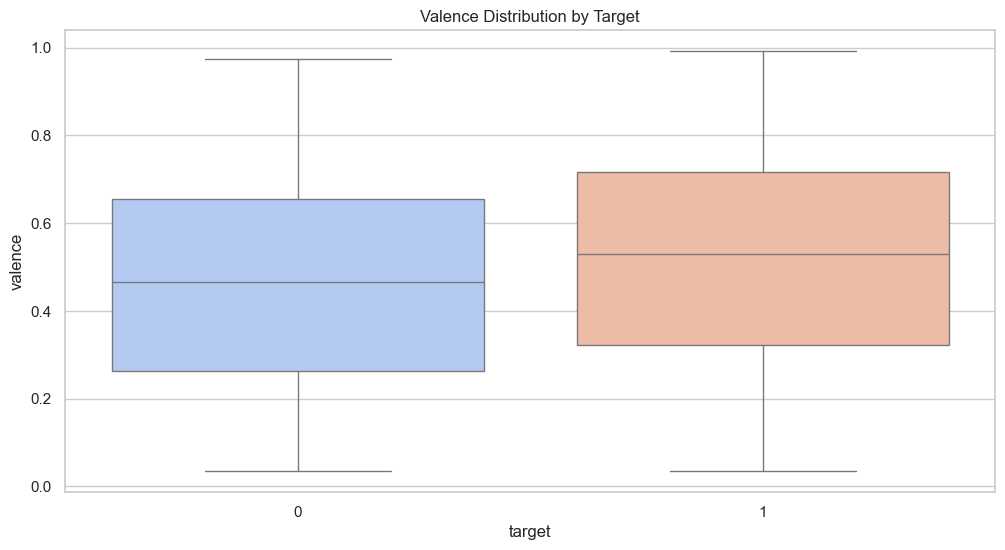

In [62]:
# Target vs. valence → Can mood predict song popularity?
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='target', y='valence', palette='coolwarm')
plt.title("Valence Distribution by Target")
plt.show()
# Boxplot to compare feature distributions for hit vs. non-hit songs
# Helps check if certain features (e.g., valence, danceability) differ significantly for successful songs
# A larger gap in medians between target=0 and target=1 suggests the feature impacts song popularity


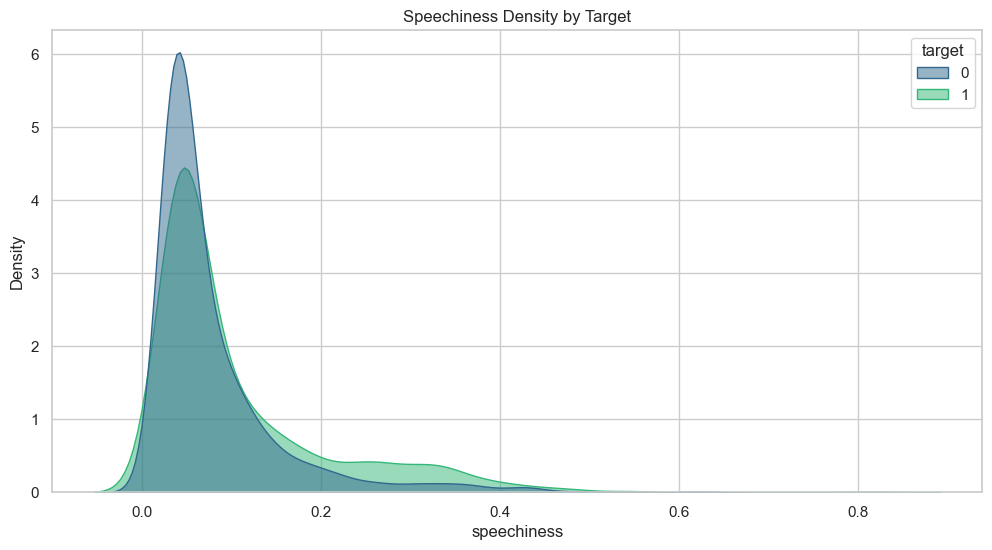

In [64]:

plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='speechiness', hue='target', fill=True, alpha=0.5, palette='viridis')
plt.title("Speechiness Density by Target")
plt.show()
# Kernel Density Estimate (KDE) plot for speechiness
# Shows whether successful songs (target=1) have more speech content than non-hits
# If speechiness is higher for target=1, speech-heavy tracks are more successful



/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_44995/3596828385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y="danceability", palette="viridis")


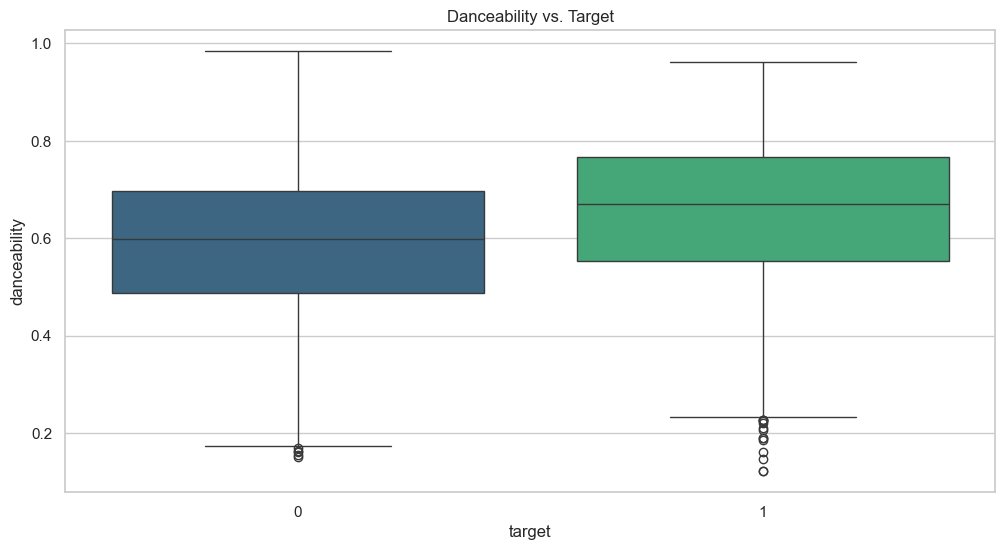

In [71]:
#Target vs. danceability → Do danceable songs tend to be hits?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="target", y="danceability", palette="viridis")
plt.title("Danceability vs. Target")
plt.show()
# Boxplot to compare feature distributions for hit vs. non-hit songs
# Helps check if certain features (e.g., valence, danceability) differ significantly for successful songs
# A larger gap in medians between target=0 and target=1 suggests the feature impacts song popularity

/var/folders/fc/s14cb1f167bc9d6mxmyf2rc80000gn/T/ipykernel_44995/2982361503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="target", y="speechiness", palette="coolwarm")


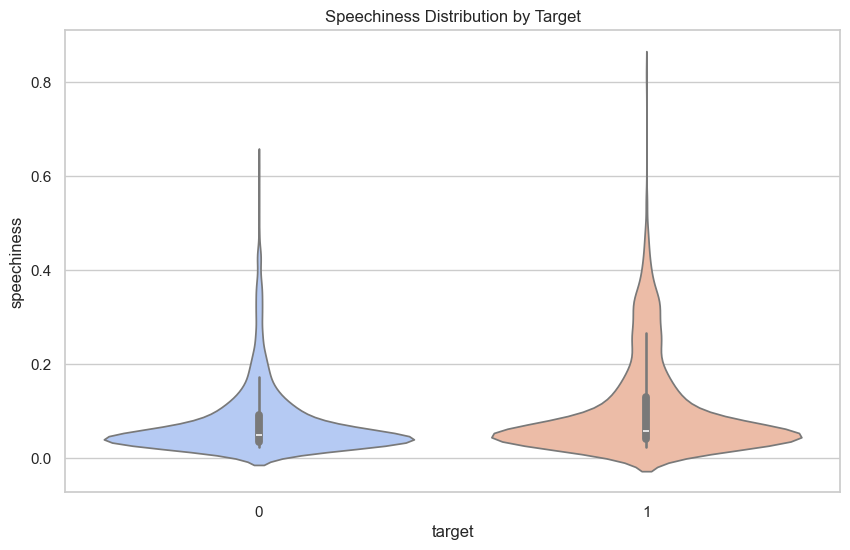

In [78]:
#Target vs. Speechiness → Are speech-heavy tracks more successful?
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="target", y="speechiness", palette="coolwarm")
plt.title("Speechiness Distribution by Target")
plt.show()
# Violin plot to visualize the distribution and spread of speechiness for hit and non-hit songs
# If speechiness values for target=1 are higher, speech-heavy tracks tend to be more successful


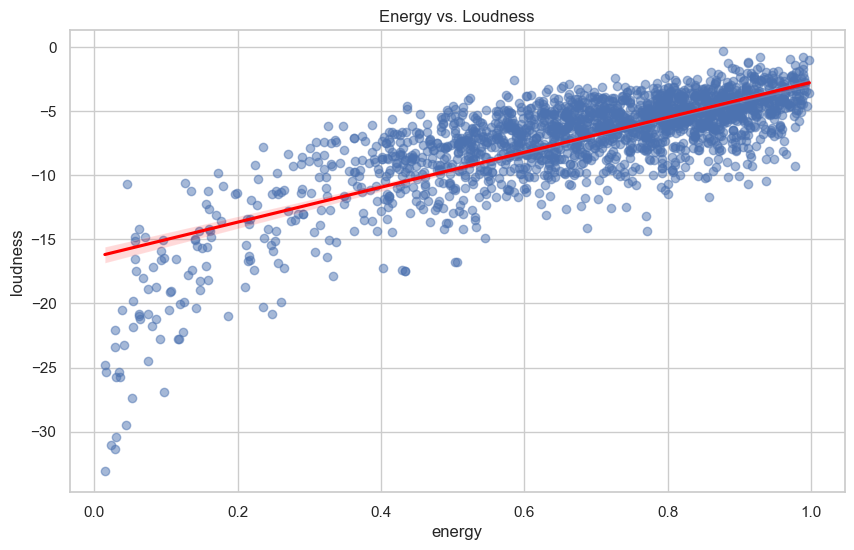

In [79]:
# Energy vs. Loudness → Are high-energy songs always louder?
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="energy", y="loudness", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Energy vs. Loudness")
plt.show()
# Regression plot to check if high-energy songs are also louder
# If the regression line is steep, energy and loudness are strongly correlated
# A clear upward trend means louder songs tend to have more energy


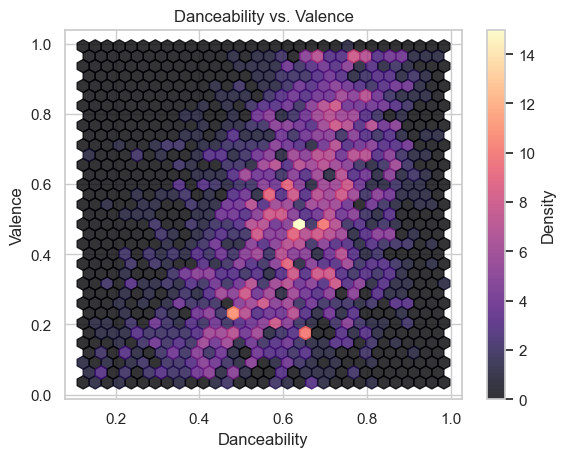

In [80]:
# plt.figure(figsize=(10, 6))
plt.hexbin(df['danceability'], df['valence'], gridsize=30, cmap='magma', alpha=0.8)
plt.colorbar(label='Density')
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.title("Danceability vs. Valence")
plt.show()
# Hexbin plot to show density of danceability vs. valence
# Helps analyze if people prefer happy dance songs
# If high-density clusters appear in the upper-right, happy songs tend to be more danceable



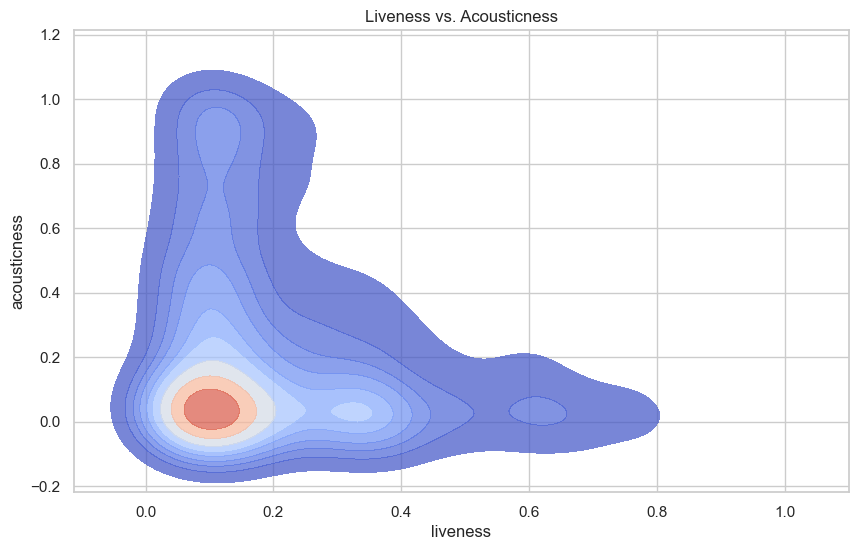

In [81]:
# Liveness vs. Acousticness → Are live songs less acoustic?
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="liveness", y="acousticness", fill=True, cmap="coolwarm", alpha=0.7)
plt.title("Liveness vs. Acousticness")
plt.show()
# KDE plot to visualize the relationship between liveness and acousticness
# If live songs (high liveness) have low acousticness, it suggests live performances are less acoustic




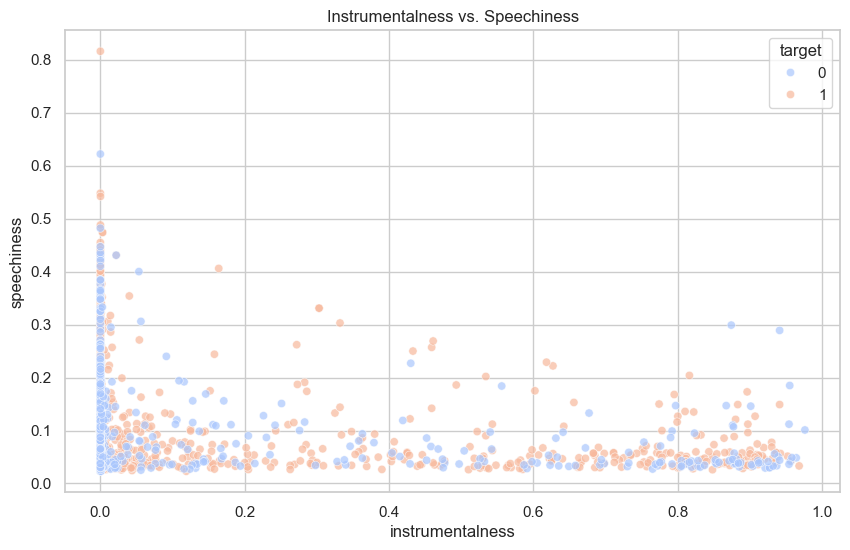

In [82]:
# Instrumentalness vs. Speechiness → Are instrumentals less wordy?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="instrumentalness", y="speechiness", hue="target", palette="coolwarm", alpha=0.7)
plt.title("Instrumentalness vs. Speechiness")
plt.show()
# Scatterplot to check if instrumental songs are less wordy
# A negative trend suggests that as instrumentalness increases, speechiness decreases


# Removing outliers


In [699]:
import pandas as pd
import numpy as np

# Define continuous and discrete columns
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'tempo', 'valence', 'speechiness', 'instrumentalness']

# Define engineered feature columns
engineered_features = ['danceability_energy', 'loudness_valence', 'danceability_valence',
                       'duration_instrumentalness', 'speechiness_valence', 'tempo_danceability',
                       'energy_tempo', 'loudness_tempo', 'speechiness_danceability',
                       'danceability_squared', 'energy_squared', 'valence_squared',
                       'instrumentalness_loudness', 'tempo_squared', 'speechiness_squared',
                       'log_duration', 'log_loudness', 'log_tempo', 'log_energy']

# Define categorical columns (not for outlier removal)
discrete_cols = ['target']

# Combine all columns
all_cols = continuous_cols + engineered_features + discrete_cols
df = df[all_cols]  # Ensure we are working only with necessary columns

# Function to Remove Outliers Using IQR
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()  # Create a copy to avoid modifying the original dataframe
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)  # 25th percentile
        Q3 = df_filtered[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data within bounds
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    
    return df_filtered

# Apply outlier removal to continuous & engineered features (excluding 'target' since it's categorical)
df_cleaned = remove_outliers_iqr(df, continuous_cols + engineered_features)

# Print dataset size before and after cleaning
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")


Original dataset size: 2017
Cleaned dataset size: 502


# Implementing Linear Regression & Logistic Regression for Prediction

In [686]:
feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
    'liveness', 'loudness',  'tempo', 'speechiness', 'instrumentalness']
target_valence = 'valence'
target_loudness = 'loudness'
target_energy = 'energy'
target_hit = 'target'  # 0 = Not a hit, 1 = Hit

In [687]:
# Drop missing values if any
df = df.dropna()


In [698]:
df['danceability_energy'] = df['danceability'] * df['energy']
df['loudness_valence'] = df['loudness'] * df['valence']
df['danceability_valence'] = df['danceability'] * df['valence']
df['duration_instrumentalness'] = df['duration_ms'] * df['instrumentalness']
df['speechiness_valence'] = df['speechiness'] * df['valence']
df['tempo_danceability'] = df['tempo'] * df['danceability']
df['energy_tempo'] = df['energy'] * df['tempo']
df['loudness_tempo'] = df['loudness'] * df['tempo']
df['speechiness_danceability'] = df['speechiness'] * df['danceability']
df['danceability_squared'] = df['danceability'] ** 2
df['energy_squared'] = df['energy'] ** 2
df['valence_squared'] = df['valence'] ** 2
df['instrumentalness_loudness'] = df['instrumentalness'] * df['loudness']
df['tempo_squared'] = df['tempo'] ** 2
df['speechiness_squared'] = df['speechiness'] ** 2
df['log_duration'] = np.log1p(df['duration_ms'])
df['log_loudness'] = np.log1p(abs(df['loudness']))  # Taking absolute to avoid log(negative)
df['log_tempo'] = np.log1p(df['tempo'])
df['log_energy'] = np.log1p(df['energy'])



In [759]:
#spliting the training data
df = df_cleaned.copy()
X_danceability = df[['energy', 'tempo', 'valence', 'speechiness', 'loudness', 
                     'log_energy', 'log_tempo', 'energy_squared']]
y_danceability = df['danceability']

X_loudness = df[['energy', 'tempo', 'instrumentalness', 'acousticness', 'liveness', 
                 'speechiness', 'tempo_squared', 'energy_tempo']]

y_loudness = df[target_loudness]

X_energy = df[['tempo', 'loudness', 'danceability', 'speechiness', 'valence', 
               'tempo_danceability',
               'speechiness_valence', 'valence_squared']]

y_energy = df[target_energy]

X_hits = df[['danceability', 'energy', 'tempo', 'loudness', 'instrumentalness', 
                  'speechiness', 'valence', 'duration_instrumentalness', 'speechiness_valence']]

y_hits = df[target_hit]



In [783]:
# Train-test split
X_train_dance, X_test_dance, y_train_dance, y_test_dance = train_test_split(X_danceability, y_danceability, test_size=0.3, random_state=42)
X_train_loud, X_test_loud, y_train_loud, y_test_loud = train_test_split(X_loudness, y_loudness, test_size=0.3, random_state=42)
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)


In [785]:
X_train_hit, X_test_hit, y_train_hit, y_test_hit = train_test_split(
    X_hits, y_hits, test_size=0.2, random_state=42, stratify=y_hits
)# stratify- This ensures that both sets have the exact same class proportions as the original dataset.


In [786]:
print(y_test_hit.value_counts(normalize=True))
print(y_train_hit.value_counts(normalize=True))


target
0    0.772277
1    0.227723
Name: proportion, dtype: float64
target
0    0.773067
1    0.226933
Name: proportion, dtype: float64


In [787]:
#Apply Logistic Regression for target classification (hit vs. non-hit)
scaler = StandardScaler()
X_train_hit_scaled = scaler.fit_transform(X_train_hit)
X_test_hit_scaled = scaler.transform(X_test_hit)

# Fine-tune regularization strength
hit_model = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', random_state=42)
hit_model.fit(X_train_hit_scaled, y_train_hit)

# Predictions
y_pred_hit = hit_model.predict(X_test_hit_scaled)
accuracy = accuracy_score(y_test_hit, y_pred_hit)

print(f"Hit Song Prediction Accuracy: {accuracy:.4f}")



Hit Song Prediction Accuracy: 0.7822


In [788]:
dance_model = LinearRegression()
dance_model.fit(X_train_dance, y_train_dance)
y_pred_dance = dance_model.predict(X_test_dance)

# Evaluate Performance
print(f"Danceability Prediction R² Score: {r2_score(y_test_dance, y_pred_dance):.4f}")
print(f"Danceability Prediction MAE: {mean_absolute_error(y_test_dance, y_pred_dance):.4f}")
print(f"Danceability Prediction MSE: {mean_squared_error(y_test_dance, y_pred_dance):.4f}")

Danceability Prediction R² Score: 0.4830
Danceability Prediction MAE: 0.0735
Danceability Prediction MSE: 0.0089


In [789]:
# Apply Linear Regression for loudness prediction
loudness_model=LinearRegression()
loudness_model.fit(X_train_loud, y_train_loud)
y_pred_loud=loudness_model.predict(X_test_loud)
print(f"Loudness Prediction R² Score: {r2_score(y_test_loud, y_pred_loud):.4f}")
print(f"Loudness Prediction MAE: {mean_absolute_error(y_test_loud, y_pred_loud):.4f}\n")
print(f"Loudness Prediction MSE: {mean_squared_error(y_test_loud, y_pred_loud):.4f}\n")



Loudness Prediction R² Score: 0.4308
Loudness Prediction MAE: 1.1034

Loudness Prediction MSE: 1.8056



In [790]:
energy_model = LinearRegression()  # You can tweak hyperparameters like max_depth
energy_model.fit(X_train_energy, y_train_energy)
y_pred_dur = energy_model.predict(X_test_energy)

# Evaluate the model
print(f"Energy Prediction R² Score: {r2_score(y_test_energy, y_pred_dur):.4f}")
print(f"Energy Prediction MAE: {mean_absolute_error(y_test_energy, y_pred_dur):.4f}")
print(f"Energy Prediction MSE: {mean_squared_error(y_test_energy, y_pred_dur):.4f}")

Energy Prediction R² Score: 0.5780
Energy Prediction MAE: 0.0706
Energy Prediction MSE: 0.0086
